In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
df = pd.read_csv('/content/drive/MyDrive/ecommerce_data.csv', encoding = 'ISO-8859-1')

In [31]:
#descriptive statistics
df.head()

,Order ID,Order Date,Ship Date,shipment days,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2013-152156,11/9/2013,11/12/2013,3,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2013-152156,11/9/2013,11/12/2013,3,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3,0.00,219.5820
2,CA-2013-138688,6/13/2013,6/17/2013,4,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2012-108966,10/11/2012,10/18/2012,7,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2012-108966,10/11/2012,10/18/2012,7,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [32]:

df.shape

(9994, 17)

In [33]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'shipment days', 'Ship Mode',
       'Segment', 'Country', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [34]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [35]:
df['Segment'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Name: Segment, Length: 9994, dtype: bool

In [54]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [39]:
df['Consumer_segment'] = df['Segment'].apply(lambda x: 0 if x == 'Consumer' else 1 if x =='Corporate' else 2 )

In [40]:
df.head()

,Order ID,Order Date,Ship Date,shipment days,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Consumer_segment
0,CA-2013-152156,11/9/2013,11/12/2013,3,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0
1,CA-2013-152156,11/9/2013,11/12/2013,3,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3,0.00,219.5820,0
2,CA-2013-138688,6/13/2013,6/17/2013,4,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,1
3,US-2012-108966,10/11/2012,10/18/2012,7,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,0
4,US-2012-108966,10/11/2012,10/18/2012,7,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0


In [41]:
Consumer_segment_df =pd.DataFrame(
    df.groupby('Consumer_segment').count()['Segment'] / df.shape[0] * 100.0
)

In [42]:
df.groupby('Consumer_segment').count()['Segment']

Consumer_segment
0    5191
1    3020
2    1783
Name: Segment, dtype: int64

In [43]:
Consumer_segment_df.T

Consumer_segment,0,1,2
Segment,51.941165,30.218131,17.840704


In [51]:
Consumer_segment_region_df = pd.pivot_table(
    df, values='Segment', index='Region', columns='Consumer_segment', aggfunc=len
).fillna(0.0)

Consumer_segment_region_df.columns = ['Consumer', 'Corporate','Home Office']


In [52]:
Consumer_segment_region_df

,Consumer,Corporate,Home Office
Region,,,
Central,1212,673,438
East,1469,877,502
South,838,510,272
West,1672,960,571


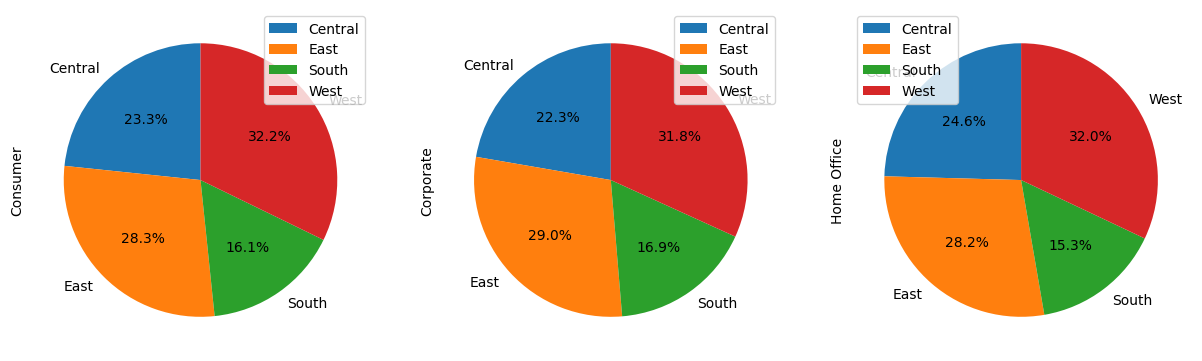

In [53]:
Consumer_segment_region_df.plot(kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

In [58]:
df.groupby('Consumer_segment').describe()['Profit'].T

Consumer_segment,0,1,2
count,5191.000000,3020.000000,1783.000000
mean,25.836873,30.456667,33.818664
std,242.594020,231.986266,212.381482
min,-6599.978000,-3839.990400,-3399.980000
25%,1.583550,1.928400,1.984250
50%,8.375400,8.694000,9.102000
75%,28.606700,29.843500,31.559850
max,6719.980800,8399.976000,3919.988800


In [70]:
import statsmodels.api as sm

In [57]:
df.describe()

,shipment days,Sales,Quantity,Discount,Profit,Consumer_segment
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,3.958875,229.858001,3.789574,0.156203,28.656896,0.658995
std,1.747097,623.245101,2.225110,0.206452,234.260108,0.762622
min,0.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,3.000000,17.280000,2.000000,0.000000,1.728750,0.000000
50%,4.000000,54.490000,3.000000,0.200000,8.666500,0.000000
75%,5.000000,209.940000,5.000000,0.200000,29.364000,1.000000
max,7.000000,22638.480000,14.000000,0.800000,8399.976000,2.000000


In [59]:
df['Profit'].dtype

dtype('float64')

In [60]:
df['Discount'].dtype

dtype('float64')

In [61]:
df['Quantity'].dtype

dtype('int64')